In [ ]:
# import models

import joblib

classification_model_path = r"D:\Heart_Disease_Project\models\Logistic_Regression.pkl"
Logistic_Regression_model = joblib.load(classification_model_path)

In [2]:
# Load data

import pandas as pd

data = pd.read_csv(r"D:\Heart_Disease_Project\data\heart_disease_data_selected_features.csv")
data.head()

X = data.drop(columns=['target'])
y = data['target']

In [6]:
from sklearn.model_selection import train_test_split

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Baseline Accuracy: 0.627906976744186
Best Logistic Regression Params: {'C': 0.01, 'solver': 'liblinear'}
GridSearchCV Accuracy: 0.6046511627906976
Best Random Forest Params: {'n_estimators': 200, 'min_samples_split': 10, 'max_depth': 20}
RandomizedSearchCV Accuracy: 0.6046511627906976
Baseline Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78        27
           1       0.12      0.14      0.13         7
           2       0.67      0.50      0.57         4
           3       0.60      0.60      0.60         5

    accuracy                           0.63        43
   macro avg       0.54      0.51      0.52        43
weighted avg       0.64      0.63      0.63        43

Optimized Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84        27
           1       0.18      0.29      0.22         7
           2       0.00      0.00      0.00 

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


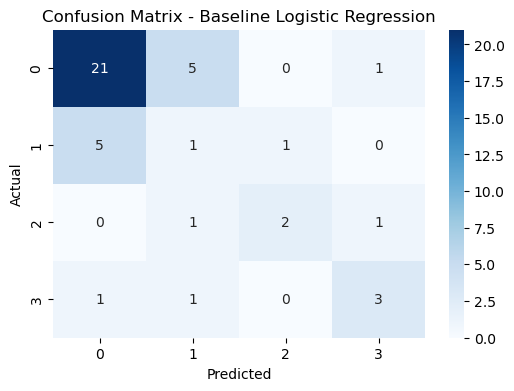

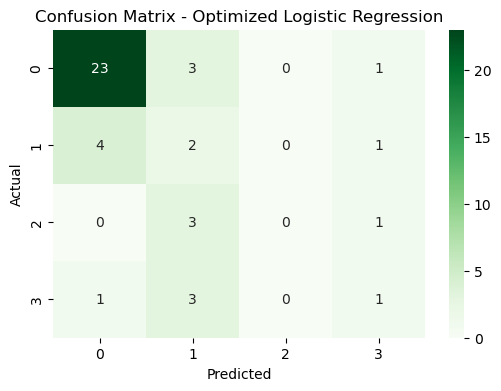

Text(45.722222222222214, 0.5, 'Actual')

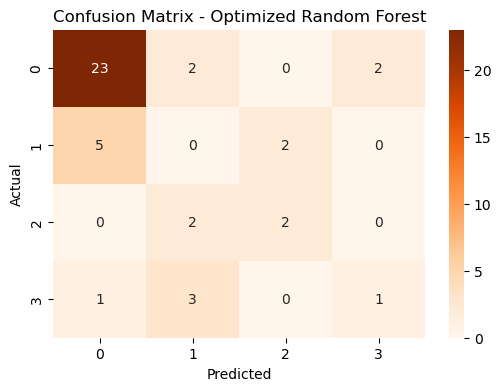

In [10]:
# hyperparameter tuning classification model

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Baseline model (Logistic Regression)
baseline = Logistic_Regression_model
y_pred_base = baseline.predict(X_test)
print("Baseline Accuracy:", accuracy_score(y_test, y_pred_base))


# 1. GridSearchCV for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}
grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train, y_train)
print("Best Logistic Regression Params:", grid_lr.best_params_)
y_pred_grid = grid_lr.predict(X_test)
print("GridSearchCV Accuracy:", accuracy_score(y_test, y_pred_grid))

# 2. RandomizedSearchCV for Random Forest
param_dist_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}
rand_rf = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_dist_rf, n_iter=10, cv=5, scoring='accuracy', random_state=42)
rand_rf.fit(X_train, y_train)
print("Best Random Forest Params:", rand_rf.best_params_)
y_pred_rand = rand_rf.predict(X_test)
print("RandomizedSearchCV Accuracy:", accuracy_score(y_test, y_pred_rand))

# Compare optimized models with baseline
print("Baseline Classification Report:\n", classification_report(y_test, y_pred_base))
print("Optimized Logistic Regression Report:\n", classification_report(y_test, y_pred_grid))
print("Optimized Random Forest Report:\n", classification_report(y_test, y_pred_rand))

# draw confusion matrix for each model

# Confusion matrix for baseline
cm_base = confusion_matrix(y_test, y_pred_base)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_base, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Baseline Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion matrix for optimized Logistic Regression
cm_grid = confusion_matrix(y_test, y_pred_grid)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_grid, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Optimized Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion matrix for optimized Random Forest
cm_rand = confusion_matrix(y_test, y_pred_rand)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rand, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix - Optimized Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [9]:
# download optimized models
joblib.dump(grid_lr.best_estimator_, r"D:\Heart_Disease_Project\models\Optimized_Logistic_Regression.pkl")
joblib.dump(rand_rf.best_estimator_, r"D:\Heart_Disease_Project\models\Optimized_Random_Forest.pkl")

['D:\\Heart_Disease_Project\\models\\Optimized_Random_Forest.pkl']

In [11]:
# download final model
joblib.dump(baseline, r"D:\Heart_Disease_Project\models\Final_Logistic_Regression_Model.pkl")

['D:\\Heart_Disease_Project\\models\\Final_Logistic_Regression_Model.pkl']